In [72]:
import pandas      as pd
import numpy       as np
import yellowbrick as yb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [73]:
#
training = pd.read_csv('../datasets/dont_overfit/train.csv')
test     = pd.read_csv('../datasets/dont_overfit/test.csv')

In [74]:
print(f'shape: {training.shape}')
training.head(30)

shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [75]:
from sklearn.linear_model  import LogisticRegression
from yellowbrick.regressor import AlphaSelection

# Selecionando somente dados contínuos para teste
training = training.select_dtypes(exclude=['object']).drop(['Id'], axis=1)
training = training.fillna(training.mean())

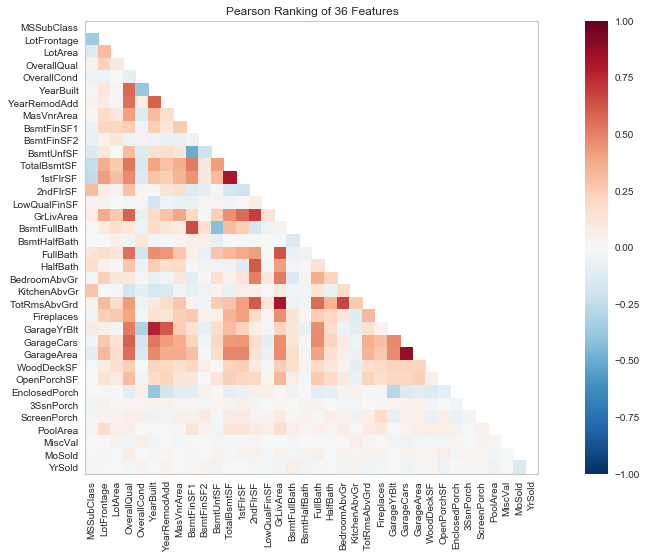

In [76]:
from yellowbrick.features import Rank2D

X = training.drop(['SalePrice'], axis=1)
y = training.SalePrice

# Correlação
viz = Rank2D(algorithm='pearson', size=(1200,600))
viz.fit(X, y)
viz.transform(X)
viz.show(size=(30,5));

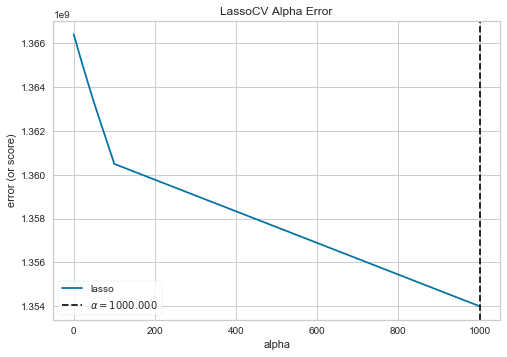

In [77]:
from sklearn.linear_model   import LassoCV
from sklearn.preprocessing  import StandardScaler
from yellowbrick.regressor  import AlphaSelection

# Create a list of alphas to cross-validate against
alphas = [0.01, 0.05, 0.10, 0.20, 0.5, 0.8, 1, 2, 5, 10, 20, 30, 50 ,100, 1000]
X = StandardScaler().fit_transform(X)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas, cv=5)
visualizer = AlphaSelection(model)
visualizer.fit(X, y)
visualizer.show()

In [78]:
# FIT ?
model.fit(X, y)

test_samples = test.select_dtypes(exclude=['object']).drop(['Id'], axis=1)
test_samples = test_samples.fillna(test.mean())
 
y_pred = model.predict(test_samples)
test['SalePrice'] = y_pred

In [83]:
submission = test[['Id', 'SalePrice']]
submission.to_csv('submission.csv', index=False)